# **Setup**

In [692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
from IPython.display import clear_output

from warnings import filterwarnings
filterwarnings('ignore')

In [693]:
# Set Style
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# **Data Import**

In [694]:
df = pd.read_csv('netflix.csv')

print(df.shape)
print(df.columns)

(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [695]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [696]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **Data Exploration 01**

## **Top 10 Directors**

In [698]:
df['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

## **Movies Vs Shows**

<Axes: xlabel='type'>

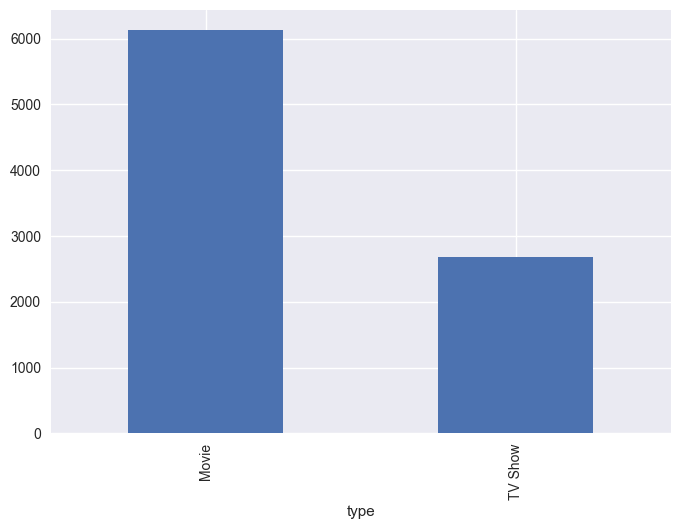

In [699]:
df.groupby(by='type')['type'].count().plot(kind='bar')

In [700]:
df['type'].value_counts(normalize=True)

type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64

In [701]:
fig = go.Figure(data=[go.Pie(labels=df['type'].value_counts(normalize=True).index,
                             values=df['type'].value_counts(normalize=True).values,
                             hole=0.5,
                             title='Movies Vs TV Shows')])
fig.show()

## **Ratings**

In [702]:
df['rating'].value_counts().to_frame()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [703]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

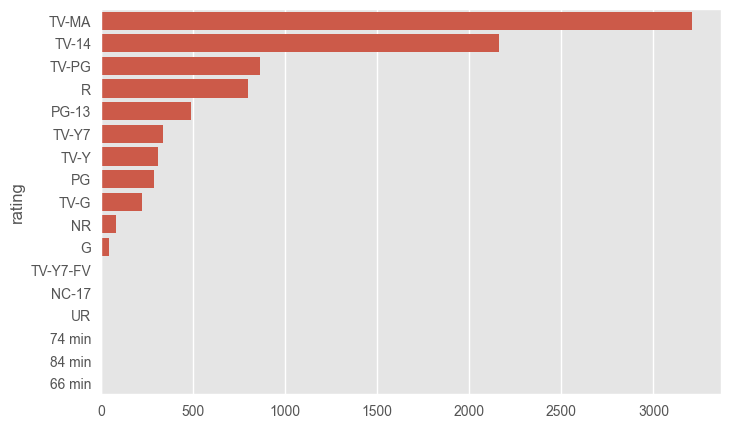

In [704]:
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
sns.barplot(data=df['rating'].value_counts().to_frame(),x=df['rating'].value_counts().values,
            y=df['rating'].value_counts().index)
plt.show()

## **Country**

In [705]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [706]:
df['country'].value_counts().tail(10)

country
Mauritius, South Africa                                            1
United Kingdom, United States, Germany, Denmark, Belgium, Japan    1
Canada, Norway                                                     1
India, United Kingdom, Canada, United States                       1
Philippines, United States                                         1
Romania, Bulgaria, Hungary                                         1
Uruguay, Guatemala                                                 1
France, Senegal, Belgium                                           1
Mexico, United States, Spain, Colombia                             1
United Arab Emirates, Jordan                                       1
Name: count, dtype: int64

## **Year Wise Count**

In [707]:
# Highest Production Years
df['release_year'].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

In [708]:
# Lowest Production Years
df['release_year'].value_counts().tail(10)

release_year
1956    2
1965    2
1946    2
1942    2
1954    2
1959    1
1925    1
1961    1
1947    1
1966    1
Name: count, dtype: int64

In [709]:
df['release_year'].value_counts().to_frame().head(10)

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


<Axes: xlabel='count', ylabel='release_year'>

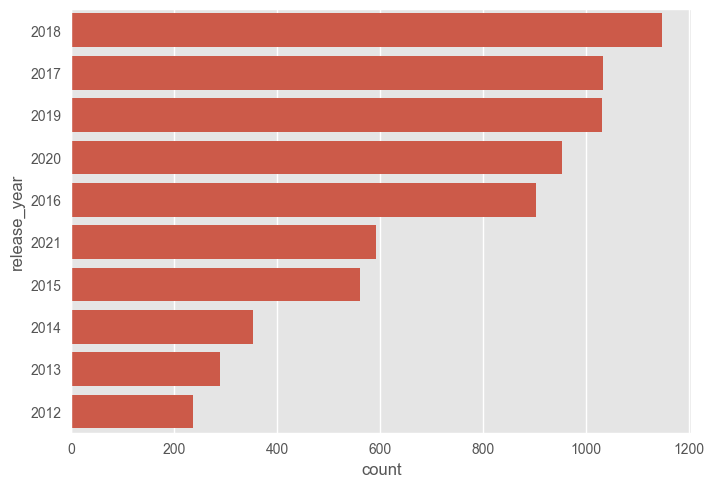

In [710]:
sns.countplot(data=df, y='release_year',
              order=df['release_year'].value_counts().index[0:10])

## **Genre**

In [711]:
df['listed_in'].value_counts().head(10)

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

In [712]:
df['listed_in'].value_counts().tail(10)

listed_in
Docuseries, Reality TV, Teen TV Shows                 1
Crime TV Shows, International TV Shows, Reality TV    1
Anime Features, Romantic Movies                       1
Anime Features, Music & Musicals                      1
British TV Shows, Kids' TV, TV Thrillers              1
Kids' TV, TV Action & Adventure, TV Dramas            1
TV Comedies, TV Dramas, TV Horror                     1
Children & Family Movies, Comedies, LGBTQ Movies      1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows    1
Cult Movies, Dramas, Thrillers                        1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='listed_in'>

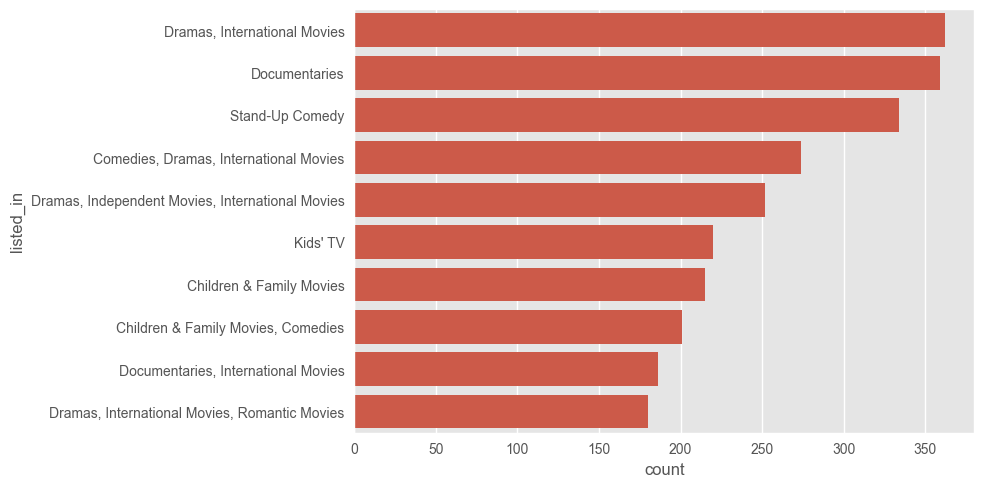

In [713]:
sns.countplot(df,y='listed_in',order=df['listed_in'].value_counts().index[0:10])

# **Data Cleaning**

In [714]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [715]:
round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

## **Remove Rating & Duration** 

In [716]:
print('Data Shape Before: ',df.shape)

df.dropna(subset=['rating','duration','date_added'],axis=0,inplace=True)
print('Data Shape After: ',df.shape)

Data Shape Before:  (8807, 12)
Data Shape After:  (8790, 12)


## **Replace Country**

In [717]:
print('Data Shape Before: ',df.shape)

df['country'].replace(to_replace=np.NaN,value='Unknown',inplace=True)
print('Data Shape After: ',df.shape)

Data Shape Before:  (8790, 12)
Data Shape After:  (8790, 12)


## **Replace Cast**

In [718]:
df.isna().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [719]:
print('Data Shape Before: ',df.shape)

df['cast'].replace(to_replace=np.NaN,value='Unknown',inplace=True)
print('Data Shape After: ',df.shape)

Data Shape Before:  (8790, 12)
Data Shape After:  (8790, 12)


## **Replace Director**

In [720]:
df.isna().sum()

show_id            0
type               0
title              0
director        2621
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [721]:
print('Data Shape Before: ',df.shape)

df['director'].replace(to_replace=np.NaN,value='Unknown',inplace=True)
print('Data Shape After: ',df.shape)

Data Shape Before:  (8790, 12)
Data Shape After:  (8790, 12)


In [722]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# **Data Transformation**

## **Change Duration Dtype**

In [723]:
df['duration'].head()

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
Name: duration, dtype: object

In [724]:
'min' in df['duration'][1]

False

In [725]:
# Convert To Integer
# df['duration'] = df['duration'].apply(lambda x: int(x.replace(' min','')) if 'min' in x else x)

In [726]:
df['duration'].describe()

count         8790
unique         220
top       1 Season
freq          1791
Name: duration, dtype: object

# **Data Exploration 02**

## **Top Actors**

In [727]:
df[df['cast']!='Unknown']['cast'].str.split(',',expand=True).stack().reset_index()

,level_0,level_1,0
0,1,0,Ama Qamata
1,1,1,Khosi Ngema
2,1,2,Gail Mabalane
3,1,3,Thabang Molaba
4,1,4,Dillon Windvogel
...,...,...,...
64011,8806,3,Manish Chaudhary
64012,8806,4,Meghna Malik
64013,8806,5,Malkeet Rauni
64014,8806,6,Anita Shabdish


In [728]:
df[df['cast']!='Unknown'].set_index('title')['cast'].str.split(',',expand=True).stack().reset_index(level=1,drop=True)

title
Blood & Water                Ama Qamata
Blood & Water               Khosi Ngema
Blood & Water             Gail Mabalane
Blood & Water            Thabang Molaba
Blood & Water          Dillon Windvogel
                          ...          
Zubaan                 Manish Chaudhary
Zubaan                     Meghna Malik
Zubaan                    Malkeet Rauni
Zubaan                   Anita Shabdish
Zubaan            Chittaranjan Tripathy
Length: 64016, dtype: object

In [729]:
Cast_Shows = df[df['cast']!='Unknown']['cast'].str.split(',',expand=True).stack().reset_index(level=1,drop=True)

print(type(Cast_Shows))
Cast_Shows

<class 'pandas.core.series.Series'>


1                   Ama Qamata
1                  Khosi Ngema
1                Gail Mabalane
1               Thabang Molaba
1             Dillon Windvogel
                 ...          
8806          Manish Chaudhary
8806              Meghna Malik
8806             Malkeet Rauni
8806            Anita Shabdish
8806     Chittaranjan Tripathy
Length: 64016, dtype: object

## **Movies Duration**

In [730]:
df_Movies = df[df['type']=='Movie']

print(df_Movies.shape)
df_Movies.head()

(6126, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [731]:
print(df['duration'].values)

['90 min' '2 Seasons' '1 Season' ... '88 min' '88 min' '111 min']


In [732]:
# Remove min
df_Movies['duration'] = df_Movies['duration'].apply(lambda x: int(x.replace(' min','')) if 'min' in x else x)

In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 1.1+ MB


In [734]:
# Convert To Integer
df_Movies['duration'] = df_Movies.loc[:,['duration']].apply(lambda x: x.astype('int64',errors='ignore'))

In [735]:
df_Movies.describe()

,release_year,duration
count,6126.000000,6126.000000
mean,2013.120144,99.584884
std,9.681723,28.283225
min,1942.000000,3.000000
25%,2012.000000,87.000000
50%,2016.000000,98.000000
75%,2018.000000,114.000000
max,2021.000000,312.000000


In [736]:
# Shortest Movie
df_Movies[df_Movies['duration']==3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",Unknown,United States,"June 4, 2019",2014,TV-Y,3,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ..."


In [737]:
# Longest Movie
df_Movies[df_Movies['duration']==312]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,Unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


## **Shows Duration**

In [738]:
df_Shows = df[df['type']=='TV Show']

print(df_Shows.shape)
df_Shows.head()

(2664, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [739]:
print(df_Shows['duration'].values)

['2 Seasons' '1 Season' '1 Season' ... '3 Seasons' '1 Season' '2 Seasons']


In [740]:
df_Shows['duration'] = df_Shows['duration'].apply(lambda x: x.replace(' Season','') if ' Season' in x else x)

In [741]:
print(df_Shows['duration'].values)

['2s' '1' '1' ... '3s' '1' '2s']


In [742]:
df_Shows['duration'] = df_Shows['duration'].apply(lambda x: x.replace('s','') if 's' in x else x)

In [743]:
print(df_Shows['duration'].values)

['2' '1' '1' ... '3' '1' '2']


In [744]:
df_Shows['duration'].info()

<class 'pandas.core.series.Series'>
Index: 2664 entries, 1 to 8803
Series name: duration
Non-Null Count  Dtype 
--------------  ----- 
2664 non-null   object
dtypes: object(1)
memory usage: 41.6+ KB


In [745]:
# Convert To Integer
df_Shows['duration'] = df_Shows.loc[:,['duration']].apply(lambda x: x.astype('int64',errors='ignore'))

In [746]:
df_Shows['duration'].info()

<class 'pandas.core.series.Series'>
Index: 2664 entries, 1 to 8803
Series name: duration
Non-Null Count  Dtype
--------------  -----
2664 non-null   int64
dtypes: int64(1)
memory usage: 41.6 KB


In [747]:
df_Shows['duration'].describe()

count    2664.000000
mean        1.751877
std         1.550622
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

In [748]:
# Shows With Highest No. Of Seasons
df_Shows[df_Shows['duration']==17]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,Unknown,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...


## **Year Wise Content**

In [755]:
Netflix_Date = df.loc[:,['date_added']].dropna()
Netflix_Date

,date_added
0,"September 25, 2021"
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
...,...
8802,"November 20, 2019"
8803,"July 1, 2019"
8804,"November 1, 2019"
8805,"January 11, 2020"


In [756]:
# Add Year Col
Netflix_Date['Year'] = Netflix_Date['date_added'].apply(lambda x: x.split(', ')[-1])
Netflix_Date['Month'] = Netflix_Date['date_added'].apply(lambda x: x.split(' ')[0])
Netflix_Date

,date_added,Year
0,"September 25, 2021",2021
1,"September 24, 2021",2021
2,"September 24, 2021",2021
3,"September 24, 2021",2021
4,"September 24, 2021",2021
...,...,...
8802,"November 20, 2019",2019
8803,"July 1, 2019",2019
8804,"November 1, 2019",2019
8805,"January 11, 2020",2020


In [758]:
# Convert Months Names To Number
Month_Order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(Month_Order)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


In [761]:
Netflix_Date.groupby('Year')['Month'].value_counts().unstack().fillna(0)

Month,,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,,
2008,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,1.0
2012,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2013,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0
2014,1.0,2.0,1.0,5.0,2.0,2.0,1.0,1.0,0.0,0.0,4.0,4.0,1.0
2015,9.0,5.0,2.0,18.0,3.0,1.0,7.0,5.0,4.0,5.0,3.0,14.0,6.0
2016,11.0,21.0,33.0,94.0,15.0,41.0,28.0,18.0,16.0,11.0,42.0,51.0,45.0


In [762]:
Netflix_Date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[Month_Order]

Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2008,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0
2012,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0
2014,2.0,2.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,4.0,4.0,5.0
2015,1.0,3.0,4.0,5.0,5.0,5.0,7.0,2.0,6.0,14.0,3.0,18.0
2016,41.0,15.0,16.0,21.0,11.0,18.0,28.0,33.0,45.0,51.0,42.0,94.0


In [763]:
Netflix_Date_New = Netflix_Date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[Month_Order].T
Netflix_Date_New

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,41.0,71.0,123.0,151.0,204.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,15.0,81.0,85.0,145.0,114.0,109.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.0,122.0,170.0,171.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,21.0,90.0,114.0,161.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,11.0,85.0,95.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,92.0,77.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,75.0,150.0,155.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,33.0,110.0,163.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,45.0,113.0,123.0,122.0,168.0,183.0


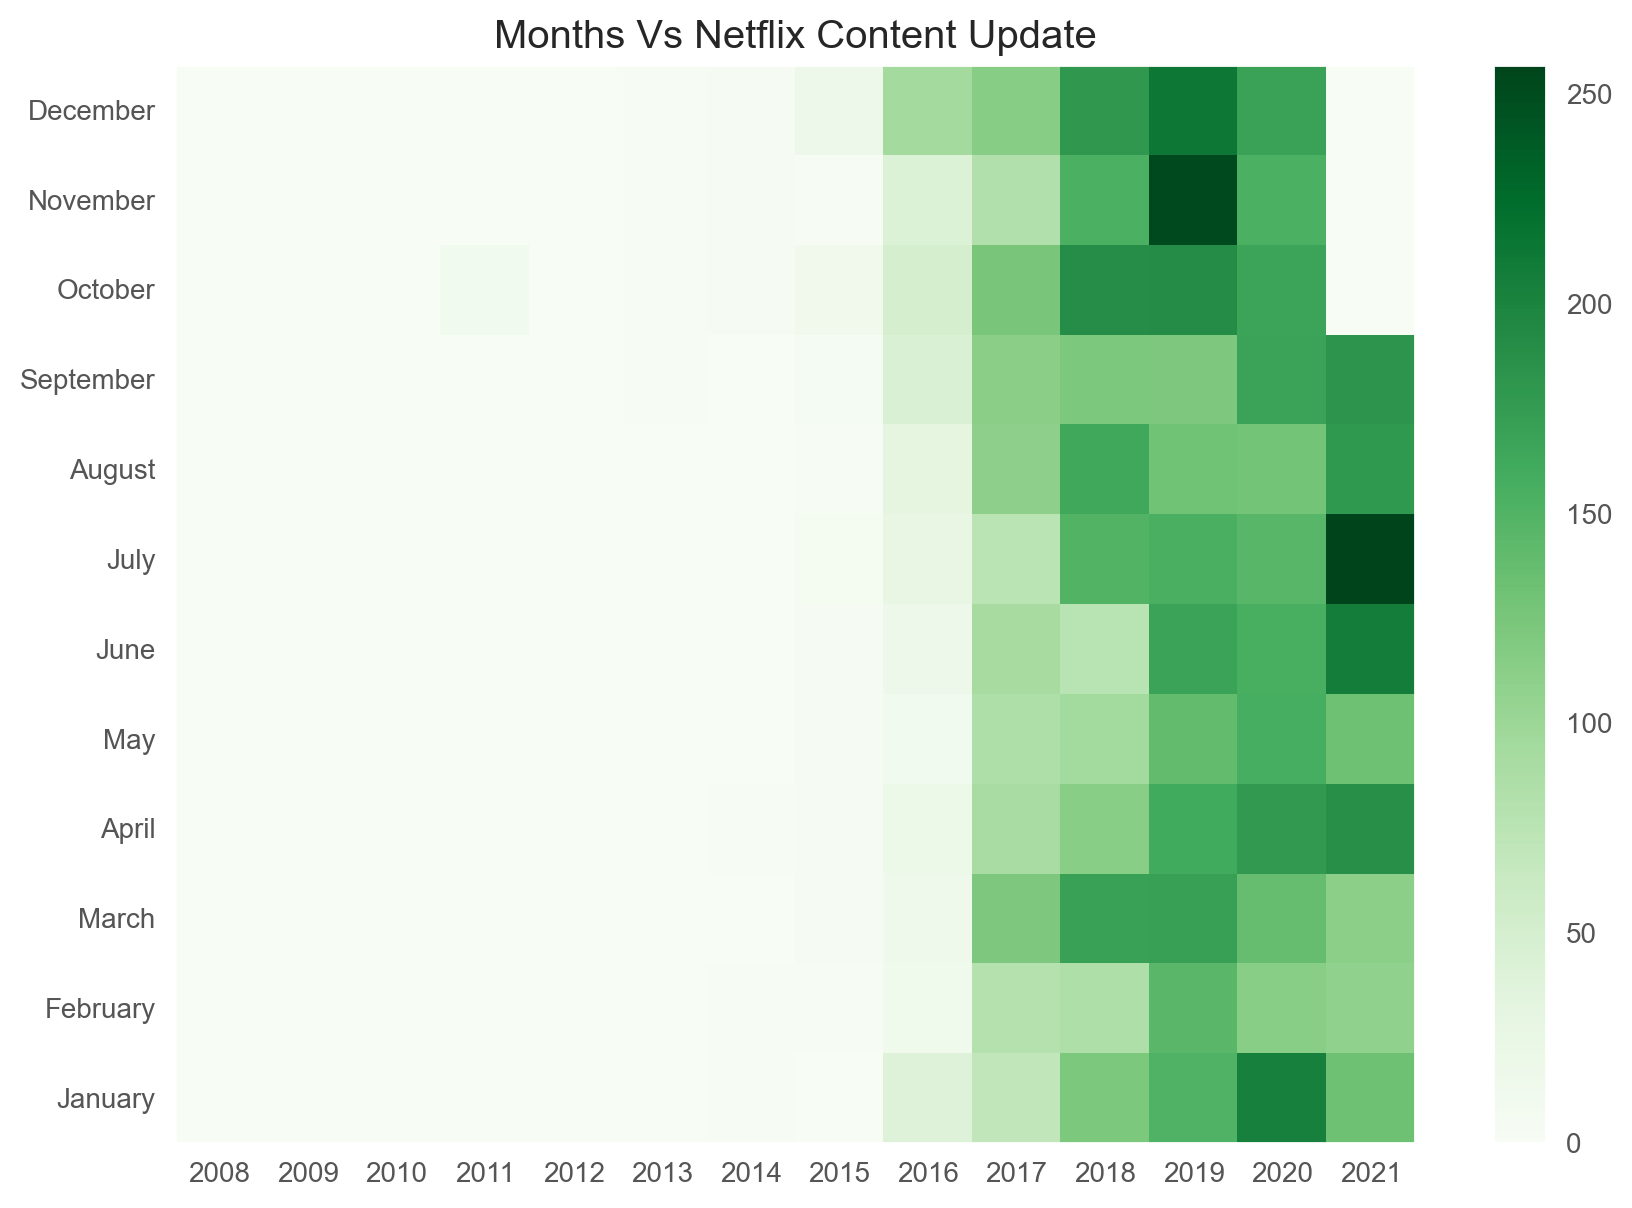

In [766]:
plt.figure(figsize=(10,7),dpi=200)
plt.pcolor(Netflix_Date_New,cmap='Greens')
plt.xticks(np.arange(0.5,len(Netflix_Date_New.columns),1),Netflix_Date_New.columns)
plt.yticks(np.arange(0.5,len(Netflix_Date_New.index),1),Netflix_Date_New.index)
plt.title('Months Vs Netflix Content Update')
plt.colorbar()

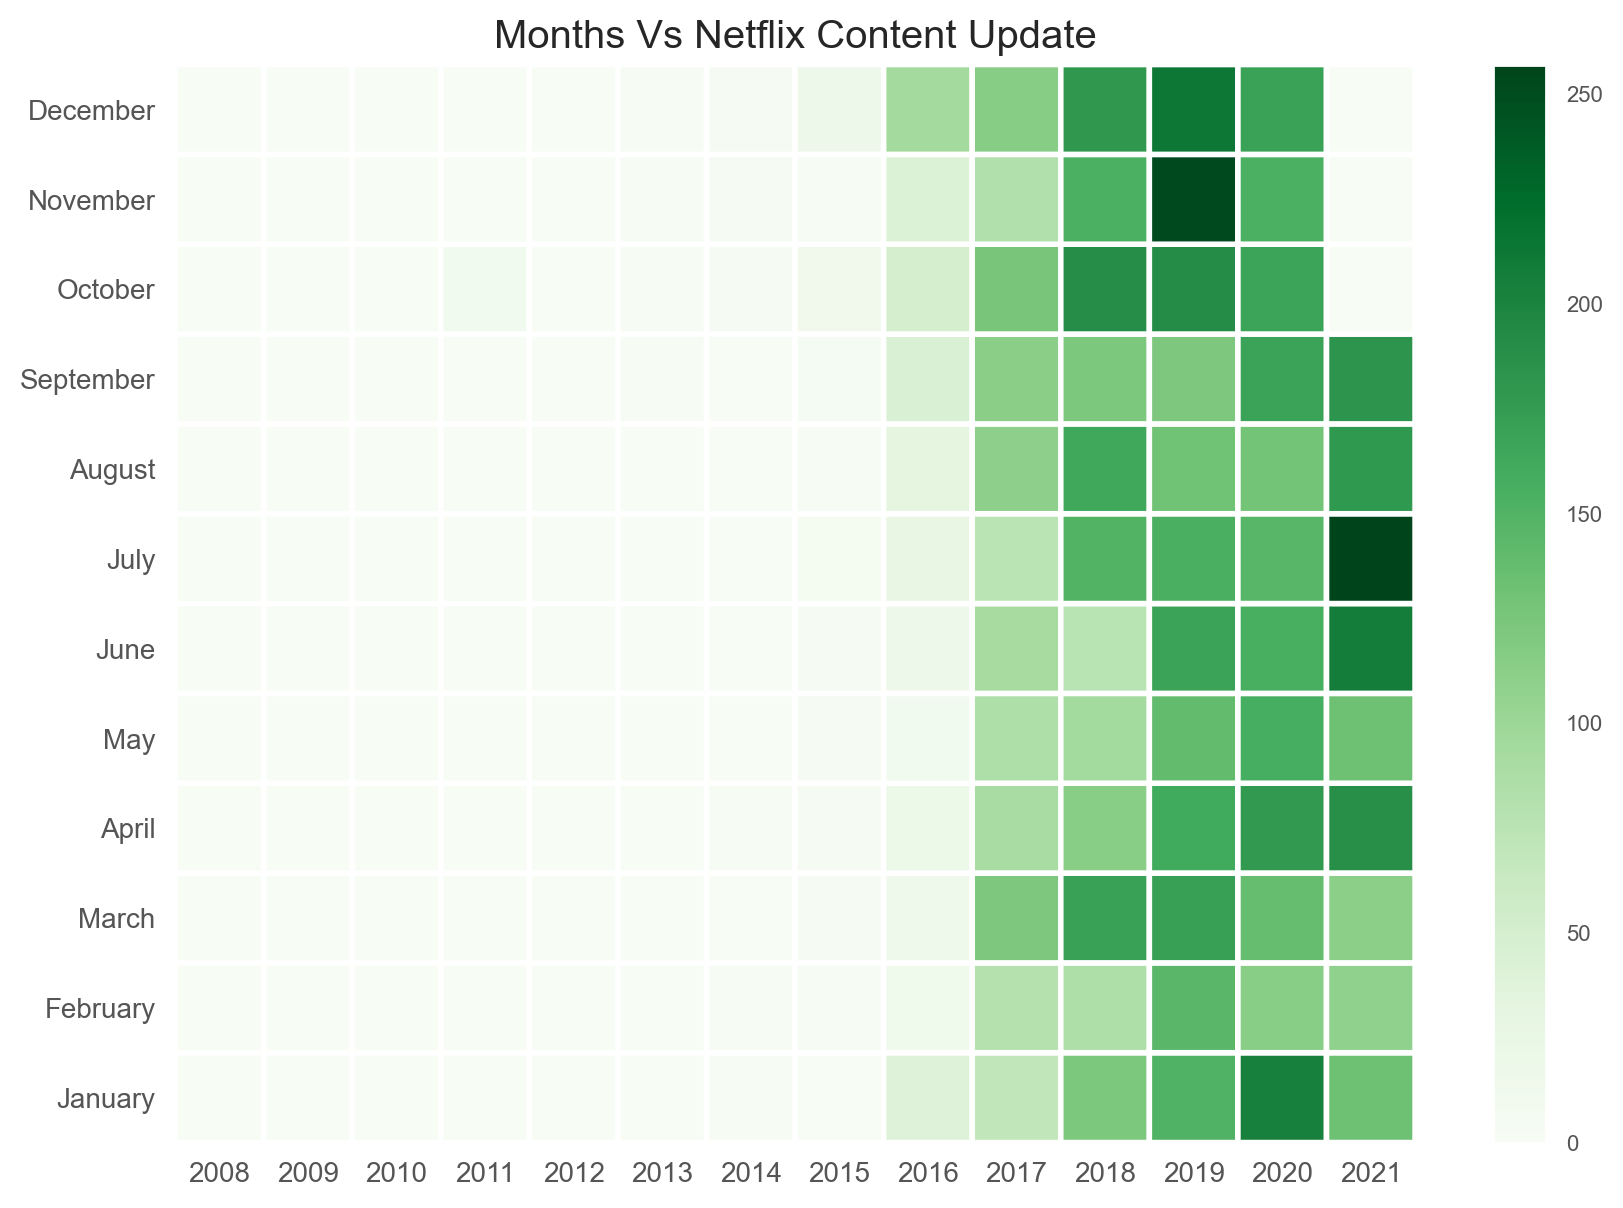

In [770]:
plt.figure(figsize=(10,7),dpi=200)
plt.pcolor(Netflix_Date_New,cmap='Greens',edgecolors='white',linewidths=2)
plt.xticks(np.arange(0.5,len(Netflix_Date_New.columns),1),Netflix_Date_New.columns)
plt.yticks(np.arange(0.5,len(Netflix_Date_New.index),1),Netflix_Date_New.index)
plt.title('Months Vs Netflix Content Update')

# CBar Detailing
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()